In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2020**

---



---

In [2]:
import pandas as pd
df_bln1 = pd.read_excel("/content/drive/MyDrive/BTL-KPDL/Forbes Billionaires n Companies/forbes companies/Forbes-2020.xlsx")

df_bln1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          2000 non-null   int64 
 1   Name          2000 non-null   object
 2   Country       2000 non-null   object
 3   Sales         2000 non-null   object
 4   Profit        2000 non-null   object
 5   Assets        2000 non-null   object
 6   Market Value  2000 non-null   object
 7   Year          2000 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 125.1+ KB


**Preprocessing**

---



In [ ]:
df_bln1 = df_bln1.drop(columns=['Rank', 'Name','Year'])
df_bln1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Country,Sales,Profit,Assets,Market Value
0,China,$177.2 B,$45.3 B,"$4,322.5 B",$242.3 B
1,China,$162.1 B,$38.9 B,"$3,822 B",$203.8 B
2,United States,$142.9 B,$30 B,"$3,139.4 B",$291.7 B
3,United States,$254.6 B,$81.4 B,$817.7 B,$455.4 B
4,China,$148.7 B,$30.9 B,"$3,697.5 B",$147.2 B
...,...,...,...,...,...
1995,China,$1.4 B,$115 M,$18.6 B,$8.3 B
1996,Spain,$594 M,$631 M,$14.9 B,$4.3 B
1997,United States,$2.1 B,$371 M,$3.1 B,$11.8 B
1998,United States,$1.2 B,$305 M,$14.1 B,$11.3 B


In [ ]:
def convert_net_worth_to_number(net_worth):
    if isinstance(net_worth, str):  # Kiểm tra nếu là chuỗi mới xử lý
        net_worth = net_worth.replace(',', '')  # Loại bỏ dấu phẩy
        value = float(net_worth.replace('$', '').replace('B', '').replace('M', ''))
        if 'B' in net_worth:
            return value
        elif 'M' in net_worth:
            value /= 1000  # Chuyển đổi thành tỷ
        return value
    else:
        return net_worth  # Giữ nguyên nếu là số float

# Áp dụng chuyển đổi cho cột 'Net Worth'
df_bln1['Profit'] = df_bln1['Profit'].apply(convert_net_worth_to_number)
df_bln1['Sales'] = df_bln1['Sales'].apply(convert_net_worth_to_number)
df_bln1['Assets'] = df_bln1['Assets'].apply(convert_net_worth_to_number)
df_bln1['Market Value'] = df_bln1['Market Value'].apply(convert_net_worth_to_number)

# Hiển thị kết quả
print(df_bln1)

            Country    Sales  Profit  Assets  Market Value
0             China  177.200  45.300  4322.5         242.3
1             China  162.100  38.900  3822.0         203.8
2     United States  142.900  30.000  3139.4         291.7
3     United States  254.600  81.400   817.7         455.4
4             China  148.700  30.900  3697.5         147.2
...             ...      ...     ...     ...           ...
1995          China    1.400   0.115    18.6           8.3
1996          Spain    0.594   0.631    14.9           4.3
1997  United States    2.100   0.371     3.1          11.8
1998  United States    1.200   0.305    14.1          11.3
1999          China    2.200   0.365     4.7          12.1

[2000 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tính toán dữ liệu null
df_bln1.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Country         0
Sales           0
Profit          0
Assets          0
Market Value    0
dtype: int64

**Thống kê**

---



*Top 10 Quốc gia có lợi nhuận cao nhất và thấp nhất*

In [ ]:
# Nhóm dữ liệu theo trường "Country" và tính tổng lợi nhuận cho mỗi nhóm
profit_by_country = df_bln1.groupby("Country")["Profit"].sum()

# Tạo DataFrame mới từ Series tổng lợi nhuận
top_countries_df = pd.DataFrame({"Country": profit_by_country.index, "Profit": profit_by_country.values})

# Sắp xếp theo tổng lợi nhuận giảm dần và lấy 10 quốc gia đầu tiên
top_10_countries = top_countries_df.sort_values(by="Profit", ascending=False).head(10)
# Sắp xếp theo tổng lợi nhuận giảm dần và lấy 10 quốc gia đầu tiên
top_10_countries_small = top_countries_df.sort_values(by="Profit", ascending=True).head(10)

# In kết quả
print(top_10_countries)

In [ ]:
# Cao nhất
import plotly.express as px
fig = px.bar( top_10_countries, x="Country", y="Profit",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 Bilionairs in Forbes list',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

1.	Có một khoảng cách rất lớn giữa tài sản của người giàu nhất (United States) và người giàu thứ 10 (United Kingdom). Điều này cho thấy sự không đều đặn trong phân bố tài sản của các tỷ phú trên thế giới.
2.	United States là quốc gia có nhiều tỷ phú nhất trong danh sách này, với tài sản của người giàu nhất vượt xa so với các quốc gia khác.
3.	biến đổi đáng kể trong tài sản của các tỷ phú khác nhau. Sự khác biệt này có thể phản ánh sự đa dạng về nguồn tài sản và quản lý tài sản của họ.
4.	Các quốc gia từ các khu vực khác nhau trên thế giới đều xuất hiện trong danh sách này, cho thấy sự phân tán đa dạng về nguồn tài sản và cơ hội kinh doanh trên toàn cầu.
5.	Sự đa dạng trong số lượng tỷ phú và tài sản của họ có thể phản ánh sự thành công trong các ngành công nghiệp và lĩnh vực kinh doanh khác nhau.


In [ ]:
# Thấp nhất
import plotly.express as px
fig = px.bar( top_10_countries_small, x="Country", y="Profit",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 Bilionairs in Forbes list',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



1.	Biểu đồ cho thấy số tỷ USD của người giàu nhất trong mỗi quốc gia. Egypt và Bahrain có người giàu nhất với số tiền gần nhau, đứng thứ 9 và 10 trong danh sách.
2.	Chênh lệch giữa người giàu nhất và thứ 2 của Argentina rất lớn, trong khi ở các quốc gia khác, chênh lệch này không quá nhiều.
3.	Argentina có người giàu nhất với giá trị âm (-0.878 tỷ USD). Điều này có thể là do biến động thị trường

[văn bản liên kết](https://)*TOP 10 QUỐC GIA SALES CAO NHẤT VÀ THẤP NHẤT*

In [ ]:
# Nhóm dữ liệu theo trường "Country" và tính tổng lợi nhuận cho mỗi nhóm
profit_by_country_sales = df_bln1.groupby("Country")["Sales"].sum()

# Tạo DataFrame mới từ Series tổng lợi nhuận
top_countries_df = pd.DataFrame({"Country": profit_by_country_sales.index, "Sales": profit_by_country_sales.values})

# Sắp xếp theo tổng lợi nhuận giảm dần và lấy 10 quốc gia đầu tiên
top_10_countries_sales = top_countries_df.sort_values(by="Sales", ascending=False).head(10)
top_10_countries_sales_small = top_countries_df.sort_values(by="Sales", ascending=True).head(10)


# In kết quả
print(top_10_countries_sales)

           Country      Sales
61   United States  13593.144
10           China   6045.085
27           Japan   4720.216
60  United Kingdom   2022.315
17          France   1951.600
18         Germany   1808.005
52     South Korea   1382.068
38     Netherlands    957.864
7           Canada    950.930
55     Switzerland    937.503


In [ ]:
# Cao nhất
import plotly.express as px
fig = px.bar( top_10_countries_sales, x="Country", y="Sales",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 highest sales',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

1.	Hoa Kỳ (United States) có doanh thu cao nhất với hơn 13.5 nghìn tỷ USD, tiếp theo là Trung Quốc (China) với khoảng 6 nghìn tỷ USD.
2.	Có một sự chênh lệch lớn về doanh thu giữa các quốc gia, với Hoa Kỳ và Trung Quốc đứng đầu và các quốc gia khác có mức doanh thu thấp hơn đáng kể.
3.	Biểu đồ cho thấy sự tập trung mạnh mẽ về doanh thu trong số một số quốc gia lớn như Hoa Kỳ, Trung Quốc, Nhật Bản và một số quốc gia khác.
4.	Một số quốc gia trong danh sách có mức doanh thu đáng chú ý nhưng cũng có thể xuất hiện những tình hình kinh tế phức tạp, ví dụ như vấn đề thương mại, sự cạnh tranh và thay đổi kinh tế quốc gia.


In [ ]:
# Thấp nhất
fig = px.bar( top_10_countries_sales_small, x="Country", y="Sales",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 lowest sales',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

1.	Các quốc gia có doanh thu thấp nhất trong Top 10 bao gồm Oman, Cayman Islands, mỗi quốc gia chỉ đạt khoảng 1.6 tỷ USD. Điều này cho thấy rằng các quốc gia này đang gặp khó khăn trong việc tăng trưởng doanh thu.
2.	Sự chênh lệch giữa các quốc gia: Sự chênh lệch giữa các quốc gia trong Top 10 là khá nhỏ, với khoảng cách giữa doanh thu thấp và giữa các quốc gia không lớn.
3.	Việc có một số quốc gia với doanh thu thấp có thể đòi hỏi xem xét chi tiết hơn về nguyên nhân. Có thể có nhiều yếu tố ảnh hưởng như tình hình kinh tế, chính trị, thị trường và sự phát triển chung trong từng quốc gia.


*TOP 10 QUỐC GIA CÓ ASSETS CAO NHẤT VÀ THẤP NHẤT*

In [ ]:
# Nhóm dữ liệu theo trường "Country" và tính tổng lợi nhuận cho mỗi nhóm
profit_by_country_assets = df_bln1.groupby("Country")["Assets"].sum()

# Tạo DataFrame mới từ Series tổng lợi nhuận
top_countries_df = pd.DataFrame({"Country": profit_by_country_assets.index, "Assets": profit_by_country_assets.values})

# Sắp xếp theo tổng lợi nhuận giảm dần và lấy 10 quốc gia đầu tiên
top_10_countries_assets = top_countries_df.sort_values(by="Assets", ascending=False).head(10)
top_10_countries_assets_small = top_countries_df.sort_values(by="Assets", ascending=True).head(10)

# In kết quả
print(top_10_countries_assets)

           Country     Assets
61   United States  47609.308
10           China  39694.568
27           Japan  22511.700
60  United Kingdom  13796.600
17          France  10612.400
7           Canada   7315.800
18         Germany   7094.700
52     South Korea   4615.600
53           Spain   4338.900
26           Italy   4317.800


In [ ]:
# Cao nhất
import plotly.express as px
fig = px.bar( top_10_countries_assets, x="Country", y="Assets",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 highest assets',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

1. Biểu đồ cho thấy rõ sự chênh lệch đáng kể về tài sản giữa các quốc gia. Hoa Kỳ (United States) và Trung Quốc (China) có mức tài sản cao hơn nhiều so với các quốc gia khác trong danh sách. Sự chênh lệch này phản ánh sự phát triển kinh tế và quy mô của các nền kinh tế này.

2. Có sự tập trung mạnh mẽ của tài sản tại một số quốc gia chính như Hoa Kỳ, Trung Quốc và Nhật Bản. Những quốc gia này thường có nền kinh tế mạnh và vị thế tài chính quốc tế, điều này có thể tạo ra tác động lớn đến kinh tế toàn cầu và thị trường tài chính.

3. Tài sản của một quốc gia thường phản ánh tình hình kinh tế chung, mức độ phát triển và sức mạnh của nền kinh tế. Sự tăng trưởng kinh tế, đầu tư và quản lý tài sản có thể góp phần tạo ra sự chênh lệch này.

In [ ]:
# Thấp nhất
fig = px.bar( top_10_countries_assets_small, x="Country", y="Assets",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 Lowest assets',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Đứng đầu danh sách, Venezuela có mức tài sản thấp nhất với chỉ 0.852 tỷ USD. Tình hình này có thể phản ánh tình trạng kinh tế khó khăn và không ổn định của quốc gia này.
Cả Kenya và Nigeria đều có mức tài sản thấp so với các nền kinh tế phát triển khác. Điều này có thể liên quan đến mức độ phát triển kinh tế chưa đạt mức cao và các thách thức trong việc phát triển kinh tế bền vững.

Monaco, một quốc gia nhỏ với dân số thấp, nằm trong danh sách với mức tài sản là 22.2 tỷ USD. Sự thấp thỏm của tài sản có thể do đặc thù kích thước và sự tập trung vào các nguồn thu khác như du lịch.

Với mức tài sản là 24.1 tỷ USD, Kazakhstan có tài sản thấp trong danh sách này. Điều này có thể phản ánh tình hình kinh tế đa dạng và sự thay đổi giá cả tài sản tự nhiên trong quốc gia.

Mức tài sản thấp của Egypt (24.1 tỷ USD) có thể phản ánh sự tác động của các thách thức kinh tế và xã hội trong quá trình phát triển.

Quốc gia Cyprus nằm trong danh sách với mức tài sản là 25 tỷ USD. Điều này có thể thể hiện sự tác động của tình hình tài chính và các yếu tố kinh tế khác trong khu vực.

Czech Republic có mức tài sản là 31.1 tỷ USD. Tuy nhiên, điều này cũng thể hiện mức độ tương đối trong khu vực Châu Âu.

Dữ liệu mới cho thấy mức tài sản của Argentina là 31.9 tỷ USD. Điều này có thể là kết quả của các biến đổi kinh tế gần đây hoặc sự điều chỉnh dữ liệu.

Oman: Với mức tài sản 31.1 tỷ USD, Oman nằm trong danh sách. Điều này có thể thể hiện tác động của nguồn tài nguyên tự nhiên và khu vực địa lý.

Mức tài sản thấp không chỉ là một bức tranh hiện tại mà còn phản ánh tiềm năng phát triển tương lai. Nhiều quốc gia có thể thúc đẩy tăng trưởng kinh tế thông qua chính sách hợp lý và hợp tác quốc tế.Các quốc gia có tài sản thấp thường cần sự hỗ trợ từ cộng đồng quốc tế, tổ chức phi chính phủ và các đối tác khác để giúp họ vượt qua các thách thức và đạt được sự tăng trưởng bền vững.

TOP 10 QUỐC GIA CÓ MARKET VALUE CAO NHẤT VÀ THẤP NHẤT

In [ ]:
# Nhóm dữ liệu theo trường "Country" và tính tổng lợi nhuận cho mỗi nhóm
profit_by_country_maketvalue = df_bln1.groupby("Country")["Market Value"].sum()

# Tạo DataFrame mới từ Series tổng lợi nhuận
top_countries_df = pd.DataFrame({"Country": profit_by_country_maketvalue.index, "Market Value": profit_by_country_maketvalue.values})

# Sắp xếp theo tổng lợi nhuận giảm dần và lấy 10 quốc gia đầu tiên
top_10_countries_maketvalue = top_countries_df.sort_values(by="Market Value", ascending=False).head(10)
top_10_countries_maketvalue_small = top_countries_df.sort_values(by="Market Value", ascending=True).head(10)

# In kết quả
print(top_10_countries_maketvalue)

           Country  Market Value
61   United States     25911.617
10           China      5979.200
27           Japan      3176.497
49    Saudi Arabia      1970.800
60  United Kingdom      1731.729
17          France      1609.760
55     Switzerland      1527.466
7           Canada      1297.960
18         Germany      1239.144
20       Hong Kong      1061.401


In [ ]:
fig = px.bar( top_10_countries_maketvalue, x="Country", y="Market Value",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 highest Market Value',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

Thống Trị Và Tăng Trưởng Mạnh Của Hoa Kỳ và Trung Quốc: Hoa Kỳ và Trung Quốc không chỉ đứng đầu danh sách mà còn có khoảng cách lớn về giá trị vốn thị trường so với các quốc gia khác. Điều này phản ánh sự thống trị tài chính của Hoa Kỳ và tăng trưởng mạnh mẽ của Trung Quốc trong nền kinh tế toàn cầu.

Vai Trò Của Nhật Bản: Nhật Bản đứng ở vị trí thứ ba về giá trị vốn thị trường, thể hiện sự quan trọng của họ trong ngành công nghiệp, công nghệ và tài chính.

Sự Tăng Cường Tài Chính Tại Châu Á: Ngoài Trung Quốc và Nhật Bản, Hồng Kông cũng có vị thế mạnh mẽ trong danh sách. Sự hiện diện mạnh mẽ của các quốc gia Châu Á thể hiện tăng trưởng đáng kể trong khu vực này.

Tầm Quan Trọng Của Liên Kết Quốc Tế: Những quốc gia có giá trị vốn thị trường cao thường có khả năng tương tác mạnh mẽ với thị trường tài chính và doanh nghiệp quốc tế. Liên kết quốc tế giúp họ tạo ra tầm ảnh hưởng và thúc đẩy cơ hội phát triển.

Khả Năng Ảnh Hưởng Đến Thị Trường Toàn Cầu: Các quốc gia hàng đầu trong danh sách có khả năng ảnh hưởng đáng kể đến biến động thị trường toàn cầu. Sự thay đổi trong tình hình kinh tế, chính trị hoặc thị trường tài chính của các quốc gia này có thể gây ra tác động lớn trên toàn thế giới.

In [ ]:
fig = px.bar( top_10_countries_maketvalue_small, x="Country", y="Market Value",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 lowest Market Value',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

*TẦN SUẤT XUẤT HIỆN CỦA CÁC QUỐC GIA*

In [ ]:
import plotly.express as px

# Tính tần số xuất hiện của các quốc gia
country_frequency = df_bln1["Country"].value_counts()

# Tạo biểu đồ cột bằng Plotly Express
fig = px.bar(country_frequency, x=country_frequency.index, y=country_frequency.values)
fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Frequency",
    title="Frequency of Countries"
)
fig.show()

**K-Means**

---



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_bln1['Country'] = label_encoder.fit_transform(df_bln1['Country'])

df_bln1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Country,Sales,Profit,Assets,Market Value
0,10,177.200,45.300,4322.5,242.3
1,10,162.100,38.900,3822.0,203.8
2,61,142.900,30.000,3139.4,291.7
3,61,254.600,81.400,817.7,455.4
4,10,148.700,30.900,3697.5,147.2
...,...,...,...,...,...
1995,10,1.400,0.115,18.6,8.3
1996,53,0.594,0.631,14.9,4.3
1997,61,2.100,0.371,3.1,11.8
1998,61,1.200,0.305,14.1,11.3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

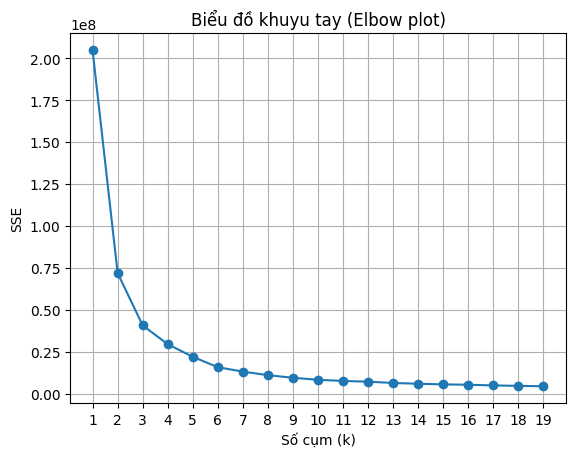

In [ ]:
# Vẽ biểu đồ SSE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
sse_values = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_bln1)
    sse_values.append(kmeans.inertia_)

#  Vẽ biểu đồ khuyu tay
plt.plot(range(1, 20), sse_values, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('SSE')
plt.title('Biểu đồ khuyu tay (Elbow plot)')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()

In [ ]:
# Chọn k=6
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_bln1[['Country', 'Sales', 'Profit', 'Assets', 'Market Value']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [ ]:
labels = kmeans.labels_
df_bln1['Cluster'] = labels
df_bln1[df_bln1['Cluster'] == 0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Country,Sales,Profit,Assets,Market Value,Cluster
50,61,76.500,9.000,153.4,111.5,0
57,22,84.800,6.200,147.2,123.8,0
67,55,48.600,12.200,123.1,193.0,0
70,61,70.300,5.000,118.6,291.8,0
72,17,60.100,8.000,108.3,194.3,0
...,...,...,...,...,...,...
1995,10,1.400,0.115,18.6,8.3,0
1996,53,0.594,0.631,14.9,4.3,0
1997,61,2.100,0.371,3.1,11.8,0
1998,61,1.200,0.305,14.1,11.3,0


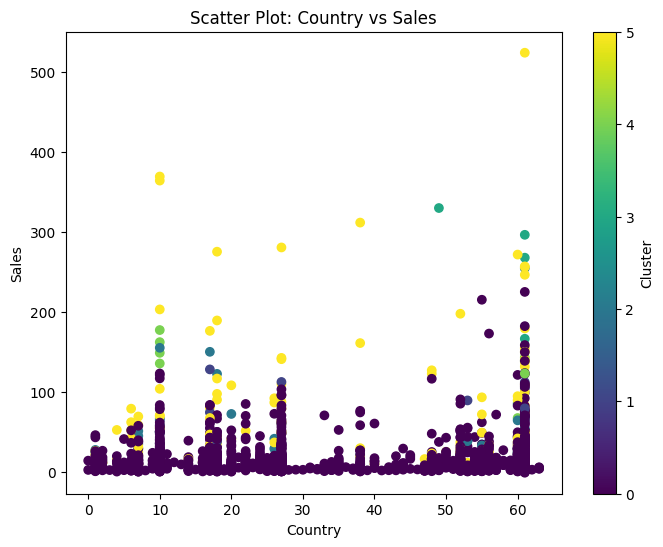

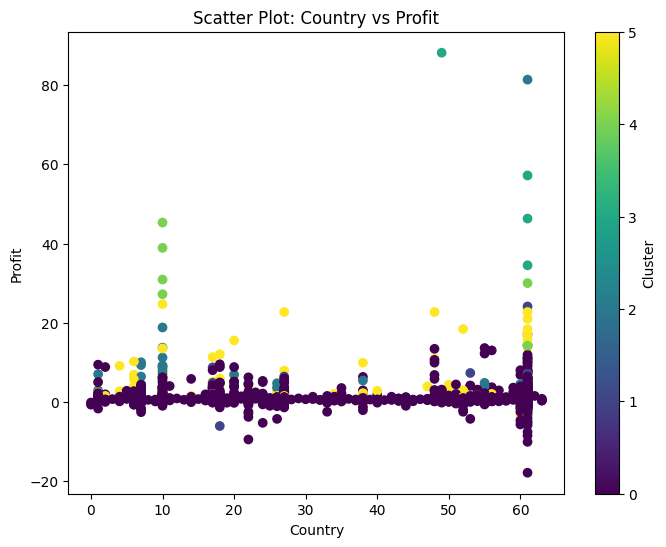

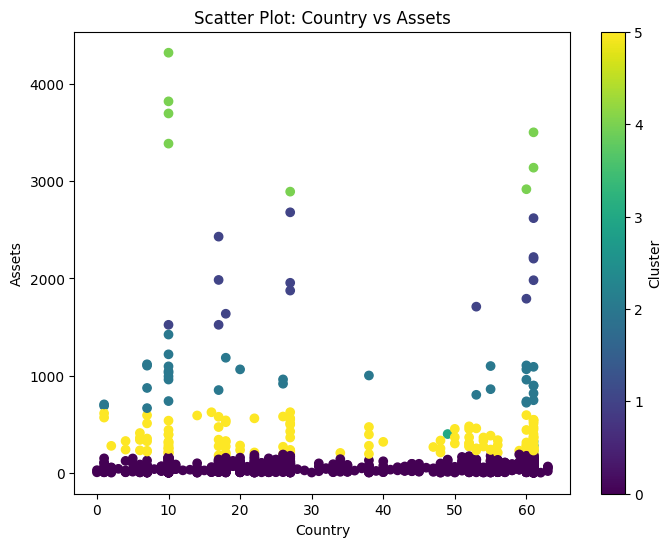

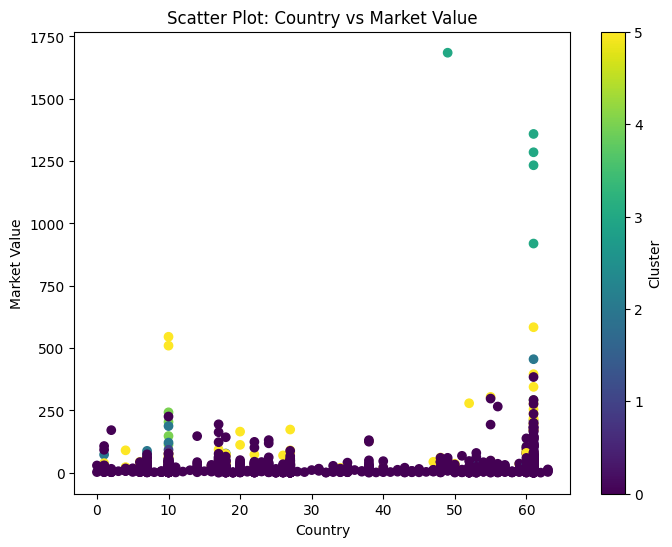

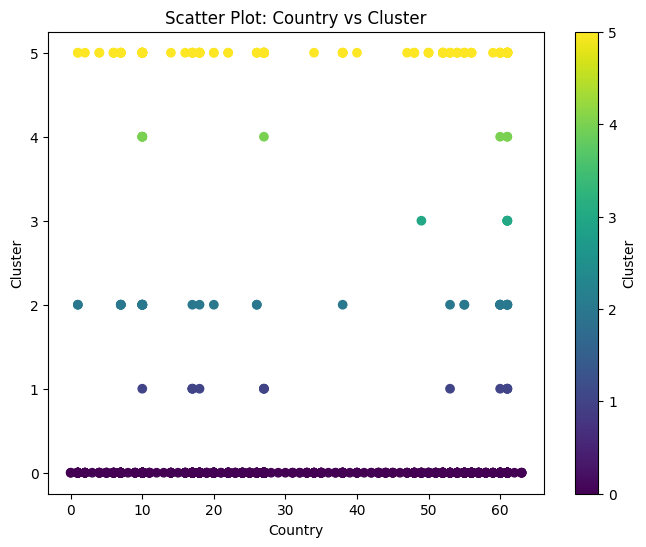

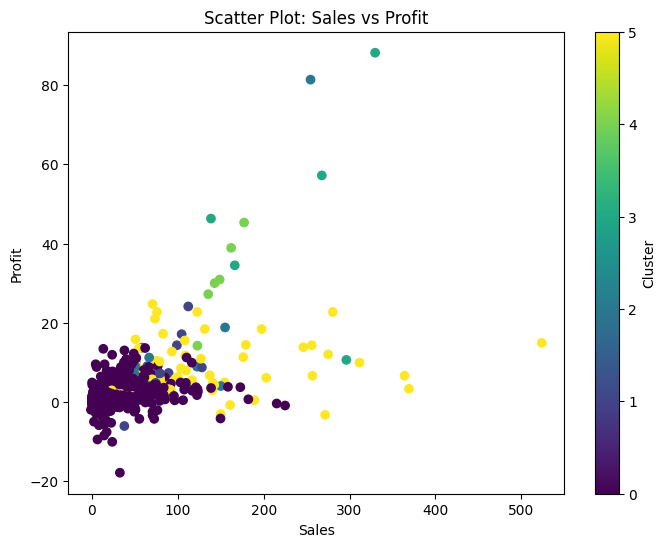

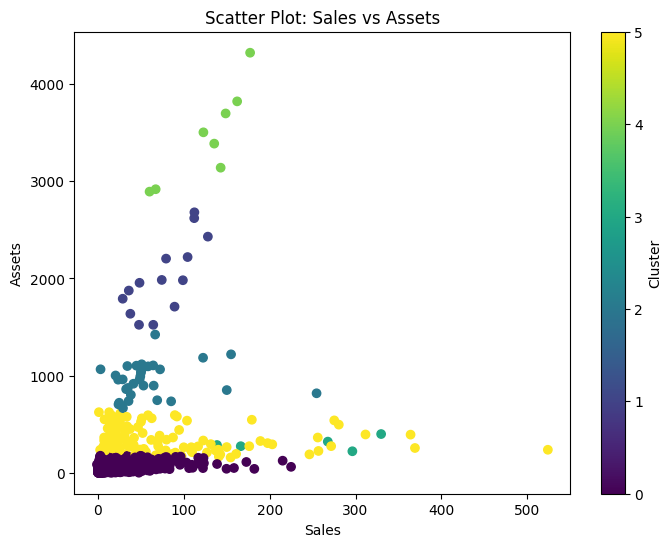

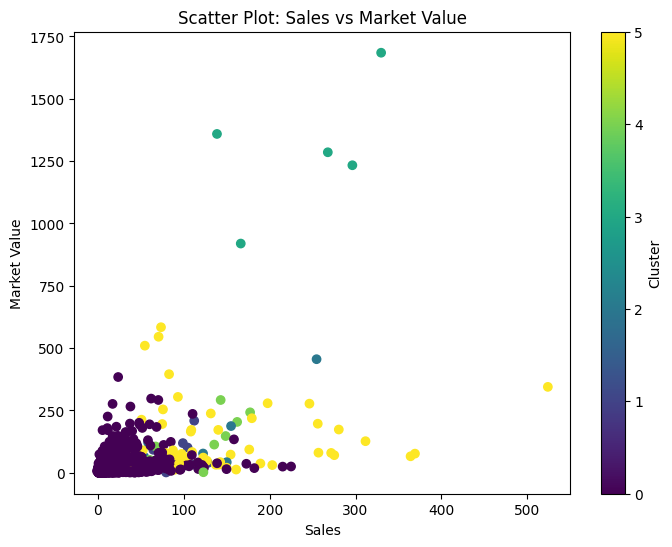

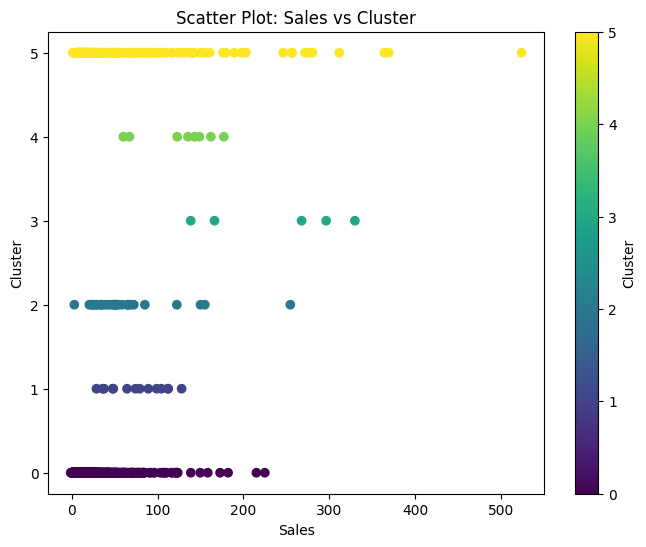

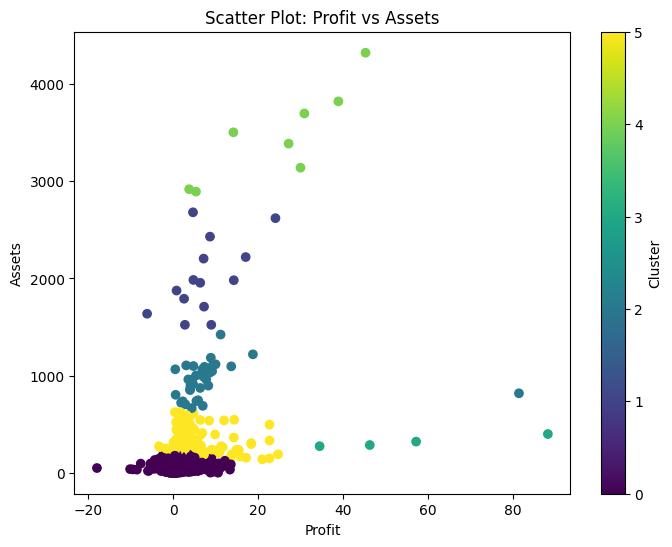

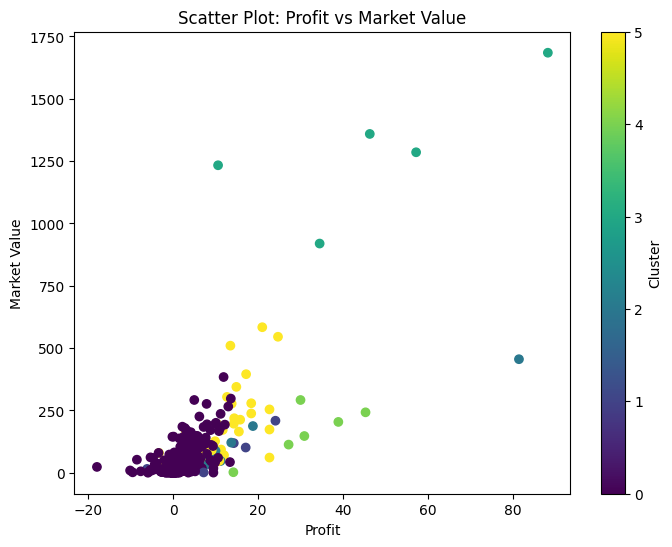

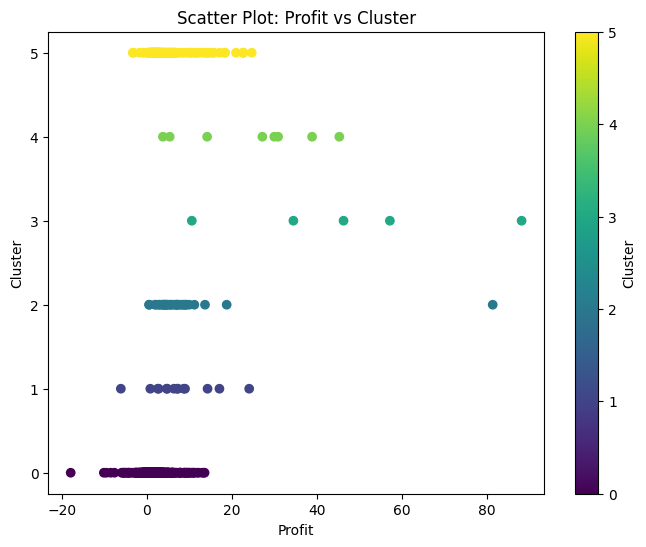

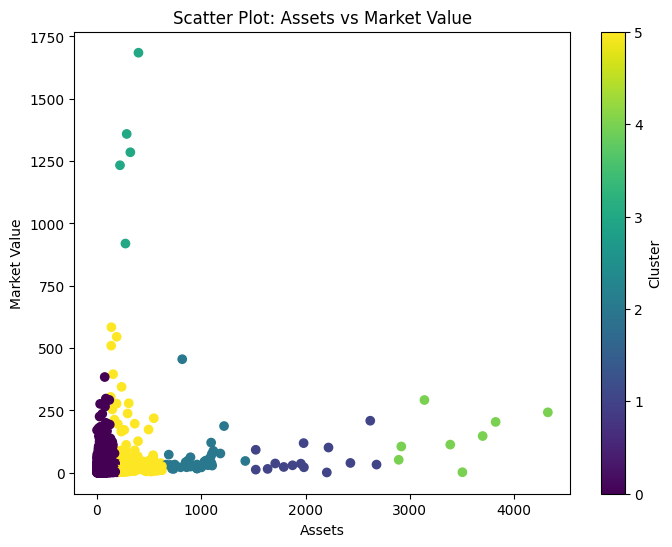

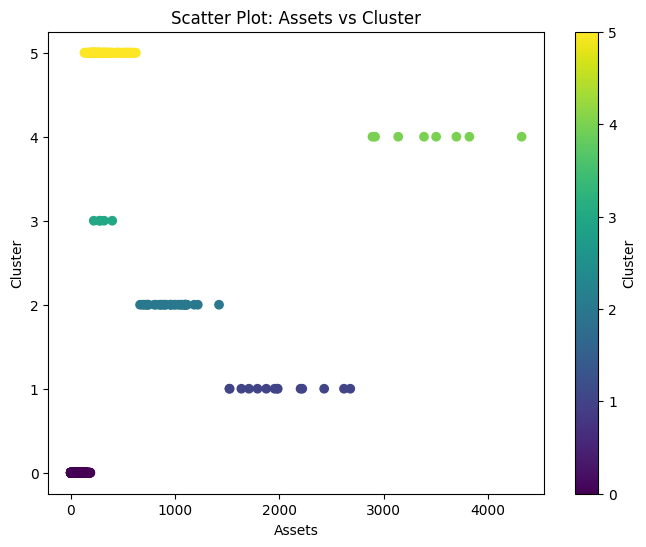

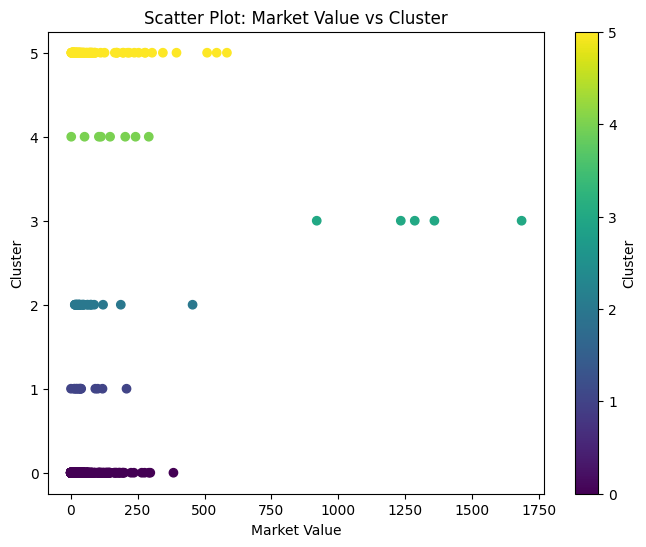

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lấy tên cột cho biểu đồ
column_names = df_bln1.columns

# Vẽ biểu đồ scatter cho từng cặp biến
for i in range(len(column_names)):
    for j in range(i + 1, len(column_names)):
        plt.figure(figsize=(8, 6))
        plt.scatter(df_bln1[column_names[i]], df_bln1[column_names[j]], c=df_bln1['Cluster'], cmap='viridis')
        plt.xlabel(column_names[i])
        plt.ylabel(column_names[j])
        plt.title(f"Scatter Plot: {column_names[i]} vs {column_names[j]}")
        plt.colorbar(label='Cluster')
        plt.show()

In [ ]:
# import pandas as pd
# df1 = pd.read_excel("/content/sample_data/Forbes-2020.xlsx")

# def convert_net_worth_to_number(net_worth):
#     if isinstance(net_worth, str):  # Kiểm tra nếu là chuỗi mới xử lý
#         net_worth = net_worth.replace(',', '')  # Loại bỏ dấu phẩy
#         value = float(net_worth.replace('$', '').replace('B', '').replace('M', ''))
#         if 'B' in net_worth:
#             return value
#         elif 'M' in net_worth:
#             value /= 1000  # Chuyển đổi thành tỷ
#         return value
#     else:
#         return net_worth  # Giữ nguyên nếu là số float

# # Áp dụng chuyển đổi cho cột 'Net Worth'
# df1['Profit'] = df1['Profit'].apply(convert_net_worth_to_number)
# df1['Sales'] = df1['Sales'].apply(convert_net_worth_to_number)
# df1['Assets'] = df1['Assets'].apply(convert_net_worth_to_number)
# df1['Market Value'] = df1['Market Value'].apply(convert_net_worth_to_number)

In [ ]:
# import pandas as pd
# df_bln1["Country"] = df_bln1["Country"].apply(lambda x: df1["Country"][x])

# df_bln1

,Country,Sales,Profit,Assets,Market Value,Cluster
0,United States,177.200,45.300,4322.5,242.3,3
1,United States,162.100,38.900,3822.0,203.8,3
2,Germany,142.900,30.000,3139.4,291.7,3
3,Germany,254.600,81.400,817.7,455.4,2
4,United States,148.700,30.900,3697.5,147.2,3
...,...,...,...,...,...,...
1995,United States,1.400,0.115,18.6,8.3,0
1996,Russia,0.594,0.631,14.9,4.3,0
1997,Germany,2.100,0.371,3.1,11.8,0
1998,Germany,1.200,0.305,14.1,11.3,0


In [ ]:
# df_bln1.to_excel('/content/drive/MyDrive/Learn/Data Mining/Bài tập lớn/K-Means_2020.xlsx', index=False)

**k-NN**

---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_1 = df_bln1.drop('Cluster', axis=1)  # Features
y_1 = df_bln1['Cluster']  # Target variable

#Chia tập dữ liệu thành tập train(80%) và tập test(20%)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=1)

#Xây dựng mô hình KNN với K lần lượt là 3, 5, 7, 9 trên tập train
from sklearn.neighbors import KNeighborsClassifier

knn_3_1 = KNeighborsClassifier(n_neighbors=3)
knn_5_1 = KNeighborsClassifier(n_neighbors=5)
knn_7_1 = KNeighborsClassifier(n_neighbors=7)
knn_9_1 = KNeighborsClassifier(n_neighbors=9)
knn_11_1 = KNeighborsClassifier(n_neighbors=11)

knn_3_1.fit(X_train_1, y_train_1)
knn_5_1.fit(X_train_1, y_train_1)
knn_7_1.fit(X_train_1, y_train_1)
knn_9_1.fit(X_train_1, y_train_1)
knn_11_1.fit(X_train_1, y_train_1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KNeighborsClassifier(n_neighbors=11)

In [ ]:
#Đánh giá mô hình trên tập test
y_pred_3_1 = knn_3_1.predict(X_test_1)
y_pred_5_1 = knn_5_1.predict(X_test_1)
y_pred_7_1 = knn_7_1.predict(X_test_1)
y_pred_9_1= knn_9_1.predict(X_test_1)
y_pred_11_1 = knn_11_1.predict(X_test_1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Tính toán sai số trên tập train và test
from sklearn.metrics import accuracy_score

train_error_3_1 = 1 - accuracy_score(y_train_1, knn_3_1.predict(X_train_1))
test_error_3_1 = 1 - accuracy_score(y_test_1, y_pred_3_1)

train_error_5_1 = 1 - accuracy_score(y_train_1, knn_5_1.predict(X_train_1))
test_error_5_1 = 1 - accuracy_score(y_test_1, y_pred_5_1)

train_error_7_1 = 1 - accuracy_score(y_train_1, knn_7_1.predict(X_train_1))
test_error_7_1 = 1 - accuracy_score(y_test_1, y_pred_7_1)

train_error_9_1 = 1 - accuracy_score(y_train_1, knn_9_1.predict(X_train_1))
test_error_9_1 = 1 - accuracy_score(y_test_1, y_pred_9_1)

train_error_11_1 = 1 - accuracy_score(y_train_1, knn_11_1.predict(X_train_1))
test_error_11_1 = 1 - accuracy_score(y_test_1, y_pred_11_1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


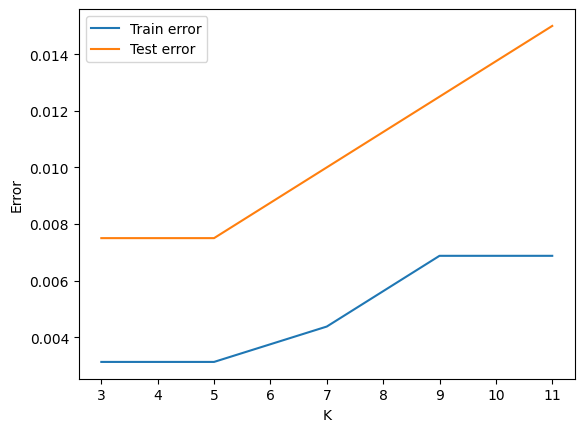

,K,Train Error,Test Error
0,3,0.003125,0.0075
1,5,0.003125,0.0075
2,7,0.004375,0.0100
3,9,0.006875,0.0125
4,11,0.006875,0.0150


In [ ]:
#Vẽ đồ thị sai số
import matplotlib.pyplot as plt

plt.plot([3, 5, 7, 9, 11], [train_error_3_1, train_error_5_1, train_error_7_1, train_error_9_1, train_error_11_1], label='Train error')
plt.plot([3, 5, 7, 9, 11], [test_error_3_1, test_error_5_1, test_error_7_1, test_error_9_1, test_error_11_1], label='Test error')

plt.xlabel('K')
plt.ylabel('Error')
plt.legend()

plt.show()

#Xuất thành dạng bảng
K_value = [3, 5, 7, 9, 11]
train_errors_1 = [train_error_3_1, train_error_5_1, train_error_7_1, train_error_9_1, train_error_11_1]
test_errors_1= [test_error_3_1, test_error_5_1, test_error_7_1, test_error_9_1, test_error_11_1]

#Tạo DataFrame từ các list trên
df_demo_1 = pd.DataFrame({'K': K_value,
                        'Train Error': train_errors_1,
                        'Test Error': test_errors_1})

#Xuất DataFrame ra file .csv
df_demo_1

Trade-off giữa Underfitting và Overfitting: Biểu đồ cho thấy cả lỗi huấn luyện và lỗi kiểm tra giảm khi giá trị K tăng. Điều này phản ánh trade-off giữa underfitting (khi K quá nhỏ) và overfitting (khi K quá lớn). Khi K quá nhỏ, mô hình có khả năng overfitting, nghĩa là nó quá tập trung vào dữ liệu huấn luyện và không hoạt động tốt trên dữ liệu kiểm tra. Khi K tăng, mô hình có khả năng underfitting, nghĩa là nó quá đơn giản để bắt chước cấu trúc của dữ liệu.

K tốt nhất: Từ biểu đồ, có thể thấy lỗi kiểm tra đạt giá trị thấp nhất khi K khoảng 11. Điều này đề xuất rằng K = 11 là giá trị tốt nhất cho mô hình trong số những giá trị K bạn đã thử.

Chênh lệch giữa lỗi huấn luyện và lỗi kiểm tra: Lỗi huấn luyện thường luôn thấp hơn hoặc bằng lỗi kiểm tra, và chênh lệch này thường càng lớn khi K tăng. Điều này là điều tốt vì nếu lỗi huấn luyện và lỗi kiểm tra gần bằng nhau hoặc lỗi huấn luyện lớn hơn, có thể có dấu hiệu của overfitting.

**Rules Mining**

---



In [ ]:
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori, association_rules

one_hot_encoder = pd.get_dummies(df_bln1, columns = ['Country'])

one_hot_encoder['Sales'] = one_hot_encoder['Sales'].apply(lambda x:1 if x>100 else 0)
one_hot_encoder['Profit'] = one_hot_encoder['Profit'].apply(lambda x:1 if x>5 else 0)
one_hot_encoder['Assets'] = one_hot_encoder['Assets'].apply(lambda x:1 if x>100 else 0)
one_hot_encoder['Market Value'] = one_hot_encoder['Market Value'].apply(lambda x:1 if x>100 else 0)

one_hot_encoder.drop(columns=['Cluster'], inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_encoded = one_hot_encoder.applymap(lambda x:True if x == 1 else False)

frequent_itemsets = apriori(data_encoded, min_support = 0.035, use_colnames = True)

rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.5)

print(rules)

rules.to_excel("/content/drive/MyDrive/Learn/Data Mining/Companies_rules_2020.xlsx")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  antecedents consequents  antecedent support  consequent support  support  \
0    (Profit)    (Assets)               0.065              0.1715    0.047   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.723077  4.216192  0.035852    2.991806       0.815849  


**Decision Tree**

---



In [ ]:
df_bln1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Country,Sales,Profit,Assets,Market Value,Cluster
0,10,177.200,45.300,4322.5,242.3,4
1,10,162.100,38.900,3822.0,203.8,4
2,61,142.900,30.000,3139.4,291.7,4
3,61,254.600,81.400,817.7,455.4,2
4,10,148.700,30.900,3697.5,147.2,4
...,...,...,...,...,...,...
1995,10,1.400,0.115,18.6,8.3,0
1996,53,0.594,0.631,14.9,4.3,0
1997,61,2.100,0.371,3.1,11.8,0
1998,61,1.200,0.305,14.1,11.3,0


In [ ]:
df_bln1.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz


# Chọn các cột đặc trưng và label
ftr1 = df_bln1[["Country",	"Sales",	"Profit",	"Assets",	"Market Value"]]

labels1 = df_bln1["Cluster"]

# Chuyển đổi các cột dữ liệu: text to num
ftr1 = pd.get_dummies(ftr1)

# Tách dữ liệu thành tập train, test
train_ftr1, test_ftr1, train_labels1, test_labels1 = train_test_split(ftr1, labels1, test_size=0.2, random_state=42)

# Xây dựng mô hình Cây quyết định
param_grid1 = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

# Tạo mô hình cây quyết định
clf1 = DecisionTreeClassifier()

#Sử dụng GridSearchCV để thử nghiệm các tham số và lựa chọn mô hình tốt nhất
grid_search1 = GridSearchCV(clf1, param_grid1, cv = 5, scoring = 'accuracy')
grid_search1.fit(train_ftr1, train_labels1)

# Lựa chọn mô hình tốt nhất sau khi thử nghiệm
best_clf1 = grid_search1.best_estimator_

# In ra các thông số tốt nhất của mô hình
print("Best Param: ", grid_search1.best_params_)
print("Best Accuracy: ",grid_search1.best_score_)


# Chuyển đổi nhãn lớp thành chuỗi
class_names_str1 = list(map(str, best_clf1.classes_))

# Tạo biểu diễn đồ thị cho cây quyết định
dot_dt1 = export_graphviz(best_clf1, out_file=None, feature_names=list(train_ftr1.columns),
                         class_names=class_names_str1, filled=True, rounded=True,
                         special_characters=True)

# Hiển thị đồ thị
graph = graphviz.Source(dot_dt1)
graph.render(filename='/content/drive/MyDrive/Forbes Billionaires n Companies/Forbes Billionaires n Companies/forbes companies/Dec_Tree-Comp-2020', format='png', cleanup=True)
graph.view()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Param:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best Accuracy:  0.99125


'/content/drive/MyDrive/Forbes Billionaires n Companies/Forbes Billionaires n Companies/forbes companies/Dec_Tree-Comp-2020.pdf'

In [ ]:
# Dự đoán kết quả trên tập Test bằng mô hình tốt nhất đã lựa chọn
predictions_1 = best_clf1.predict(test_ftr1)

accuracy1 = accuracy_score(test_labels1, predictions_1)
print("Accuracy on Test Set: ", accuracy1)

Accuracy on Test Set:  0.9875


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tách dữ liệu thành hai tập train và test
train_ftr1, test_ftr1, train_labels1, test_labels1 = train_test_split(ftr1, labels1, test_size=0.2, random_state=42)

# Xây dựng mô hình cây quyết định (REP Tree) với giới hạn độ sâu max_depth
max_depth1 = 10
clf1 = DecisionTreeClassifier(max_depth = max_depth1)

# Huấn luyện mô hình trên tập Train
clf1.fit(train_ftr1, train_labels1)

# Dự đoán kết quả trên tập Test
predictions_1 = clf1.predict(test_ftr1)

# Đánh giá hiệu suất của mô hình trên tập Test
accuracy1_test = accuracy_score(test_labels1, predictions_1)
print("Accuracy on Test Set: ", accuracy1_test)

Accuracy on Test Set:  0.9875


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 2021

---



---



In [ ]:
import pandas as pd
df_bln2 = pd.read_excel("/content/drive/MyDrive/BTL-KPDL/Forbes Billionaires n Companies/forbes companies/Forbes-2021.xlsx")

df_bln2.info()

**Preprocessing**

---



In [ ]:
df_bln2 = df_bln2.drop(columns=['Rank', 'Name','Year'])
df_bln2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Country,Sales,Profit,Assets,Market Value
0,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B
1,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B
2,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B
3,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B
4,Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B"
...,...,...,...,...,...
2095,Japan,$13.1 B,$-34.9 M,$12 B,$3.5 B
2096,Australia,$5.4 B,$-212 M,$25 B,$9.3 B
2097,China,$13 B,$79.2 M,$7.1 B,$1.3 B
2098,South Africa,$3.9 B,$718.1 M,$7.5 B,$8.9 B


In [ ]:
def convert_net_worth_to_number(net_worth):
    if isinstance(net_worth, str):  # Kiểm tra nếu là chuỗi mới xử lý
        net_worth = net_worth.replace(',', '')  # Loại bỏ dấu phẩy
        value = float(net_worth.replace('$', '').replace('B', '').replace('M', ''))
        if 'B' in net_worth:
            return value
        elif 'M' in net_worth:
            value /= 1000  # Chuyển đổi thành tỷ
        return value
    else:
        return net_worth  # Giữ nguyên nếu là số float

# Áp dụng chuyển đổi cho cột 'Net Worth'
df_bln2['Profit'] = df_bln2['Profit'].apply(convert_net_worth_to_number)
df_bln2['Sales'] = df_bln2['Sales'].apply(convert_net_worth_to_number)
df_bln2['Assets'] = df_bln2['Assets'].apply(convert_net_worth_to_number)
df_bln2['Market Value'] = df_bln2['Market Value'].apply(convert_net_worth_to_number)

# Hiển thị kết quả
print(df_bln2)

            Country    Sales   Profit  Assets  Market Value
0             China  190.500  45.8000  4914.7         249.5
1     United States  136.200  40.4000  3689.3         464.8
2     United States  245.500  42.5000   873.7         624.4
3             China  173.500  39.3000  4301.7         210.4
4      Saudi Arabia  229.700  49.3000   510.3        1897.2
...             ...      ...      ...     ...           ...
2095          Japan   13.100  -0.0349    12.0           3.5
2096      Australia    5.400  -0.2120    25.0           9.3
2097          China   13.000   0.0792     7.1           1.3
2098   South Africa    3.900   0.7181     7.5           8.9
2099  United States    0.841   0.1434     2.6          24.0

[2100 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tính toán dữ liệu null
df_bln2.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Country         0
Sales           0
Profit          0
Assets          2
Market Value    0
dtype: int64

In [ ]:
df_bln2.fillna(df_bln2.mean(), inplace = True)

# Kiểm tra lại dữ liệu sau khi thay thế xem còn dữ liệu null, hay trùng không.
df_bln2.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-39-03b3de922226>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_bln2.fillna(df_bln2.mean(), inplace = True)


Country         0
Sales           0
Profit          0
Assets          0
Market Value    0
dtype: int64

**THỐNG KÊ**

---



*TOP 10 QUỐC GIA CÓ LỢI NHUẬN CAO NHẤT VÀ THẤP NHẤT*

In [ ]:
# Nhóm dữ liệu theo trường "Country" và tính tổng lợi nhuận cho mỗi nhóm
profit_by_country = df_bln2.groupby("Country")["Profit"].sum()

# Tạo DataFrame mới từ Series tổng lợi nhuận
top_countries_df = pd.DataFrame({"Country": profit_by_country.index, "Profit": profit_by_country.values})

# Sắp xếp theo tổng lợi nhuận giảm dần và lấy 10 quốc gia đầu tiên
top_10_countries = top_countries_df.sort_values(by="Profit", ascending=False).head(10)
# Sắp xếp theo tổng lợi nhuận giảm dần và lấy 10 quốc gia đầu tiên
top_10_countries_small = top_countries_df.sort_values(by="Profit", ascending=True).head(10)

# In kết quả
print(top_10_countries)

In [ ]:
# Cao nhất
import plotly.express as px
fig = px.bar( top_10_countries, x="Country", y="Profit",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 Bilionairs in Forbes list',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

In [ ]:
# Thấp nhất
import plotly.express as px
fig = px.bar( top_10_countries_small, x="Country", y="Profit",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 Bilionairs in Forbes list',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

*TOP 10 QUỐC GIA SALES CAO NHẤT VÀ THẤP NHẤT*

In [ ]:
# Nhóm dữ liệu theo trường "Country" và tính tổng lợi nhuận cho mỗi nhóm
profit_by_country_sales = df_bln2.groupby("Country")["Sales"].sum()

# Tạo DataFrame mới từ Series tổng lợi nhuận
top_countries_df = pd.DataFrame({"Country": profit_by_country_sales.index, "Sales": profit_by_country_sales.values})

# Sắp xếp theo tổng lợi nhuận giảm dần và lấy 10 quốc gia đầu tiên
top_10_countries_sales = top_countries_df.sort_values(by="Sales", ascending=False).head(10)
top_10_countries_sales_small = top_countries_df.sort_values(by="Sales", ascending=True).head(10)


# In kết quả
print(top_10_countries_sales)

In [ ]:
# Cao nhất
import plotly.express as px
fig = px.bar( top_10_countries_sales, x="Country", y="Sales",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 highest sales',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

In [ ]:
# Thấp nhất
fig = px.bar( top_10_countries_sales_small, x="Country", y="Sales",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 lowest sales',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

*TOP 10 QUỐC GIA CÓ ASSETS CAO NHẤT VÀ THẤP NHẤT*

In [ ]:
# Nhóm dữ liệu theo trường "Country" và tính tổng lợi nhuận cho mỗi nhóm
profit_by_country_assets = df_bln2.groupby("Country")["Assets"].sum()

# Tạo DataFrame mới từ Series tổng lợi nhuận
top_countries_df = pd.DataFrame({"Country": profit_by_country_assets.index, "Assets": profit_by_country_assets.values})

# Sắp xếp theo tổng lợi nhuận giảm dần và lấy 10 quốc gia đầu tiên
top_10_countries_assets = top_countries_df.sort_values(by="Assets", ascending=False).head(10)
top_10_countries_assets_small = top_countries_df.sort_values(by="Assets", ascending=True).head(10)

# In kết quả
print(top_10_countries_assets)

In [ ]:
# Cao nhất
import plotly.express as px
fig = px.bar( top_10_countries_assets, x="Country", y="Assets",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 highest assets',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

In [ ]:
# Thấp nhất
fig = px.bar( top_10_countries_assets_small, x="Country", y="Assets",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 highest assets',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

*TOP 10 QUỐC GIA CÓ MARKET VALUE CAO NHẤT VÀ THẤP NHẤT*

In [ ]:
# Nhóm dữ liệu theo trường "Country" và tính tổng lợi nhuận cho mỗi nhóm
profit_by_country_maketvalue = df_bln2.groupby("Country")["Market Value"].sum()

# Tạo DataFrame mới từ Series tổng lợi nhuận
top_countries_df = pd.DataFrame({"Country": profit_by_country_maketvalue.index, "Market Value": profit_by_country_maketvalue.values})

# Sắp xếp theo tổng lợi nhuận giảm dần và lấy 10 quốc gia đầu tiên
top_10_countries_maketvalue = top_countries_df.sort_values(by="Market Value", ascending=False).head(10)
top_10_countries_maketvalue_small = top_countries_df.sort_values(by="Market Value", ascending=True).head(10)

# In kết quả
print(top_10_countries_maketvalue)

In [ ]:
# Cao nhất
fig = px.bar( top_10_countries_maketvalue, x="Country", y="Market Value",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 highest Maket Value',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

In [ ]:
# Thấp nhất
fig = px.bar( top_10_countries_maketvalue_small, x="Country", y="Market Value",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 slow Maket Value',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

*TẦN SUẤT XUẤT HIỆN CỦA CÁC QUỐC GIA*

In [ ]:
import plotly.express as px

# Tính tần số xuất hiện của các quốc gia
country_frequency = df_bln2["Country"].value_counts()

# Tạo biểu đồ cột bằng Plotly Express
fig = px.bar(country_frequency, x=country_frequency.index, y=country_frequency.values)
fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Frequency",
    title="Frequency of Countries"
)
fig.show()

**K-Means**

---



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_bln2['Country'] = label_encoder.fit_transform(df_bln2['Country'])

df_bln2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Country,Sales,Profit,Assets,Market Value
0,10,190.500,45.8000,4914.7,249.5
1,58,136.200,40.4000,3689.3,464.8
2,58,245.500,42.5000,873.7,624.4
3,10,173.500,39.3000,4301.7,210.4
4,46,229.700,49.3000,510.3,1897.2
...,...,...,...,...,...
2095,27,13.100,-0.0349,12.0,3.5
2096,1,5.400,-0.2120,25.0,9.3
2097,10,13.000,0.0792,7.1,1.3
2098,48,3.900,0.7181,7.5,8.9


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

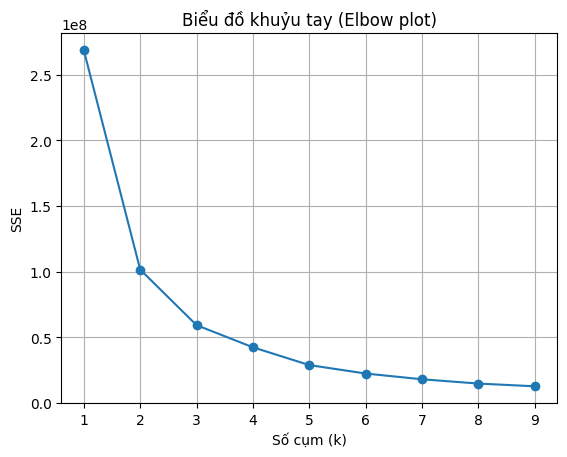

In [ ]:
# Vẽ biểu đồ SSE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
sse_values = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_bln2)
    sse_values.append(kmeans.inertia_)

#  Vẽ biểu đồ khuyu tay
plt.plot(range(1, 10), sse_values, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('SSE')
plt.title('Biểu đồ khuỷu tay (Elbow plot)')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()

In [ ]:
# Chọn k=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_bln2[['Country', 'Sales', 'Profit', 'Assets', 'Market Value']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
labels = kmeans.labels_
df_bln2['Cluster'] = labels
df_bln2[df_bln2['Cluster'] == 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Country,Sales,Profit,Assets,Market Value,Cluster
7,10,169.1,20.8000,1453.8,211.2,1
15,58,84.4,17.1000,2314.3,151.2,1
18,58,85.9,7.4000,1959.5,181.5,1
21,10,60.4,14.1000,1278.5,192.8,1
23,18,129.9,7.8000,1357.5,108.0,1
25,58,61.8,15.1000,1302.0,116.5,1
27,10,67.2,9.3000,1736.2,112.4,1
30,58,56.7,13.4000,1158.8,123.9,1
37,8,42.9,8.8000,1308.2,135.0,1
41,8,38.8,9.1000,1358.6,120.6,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


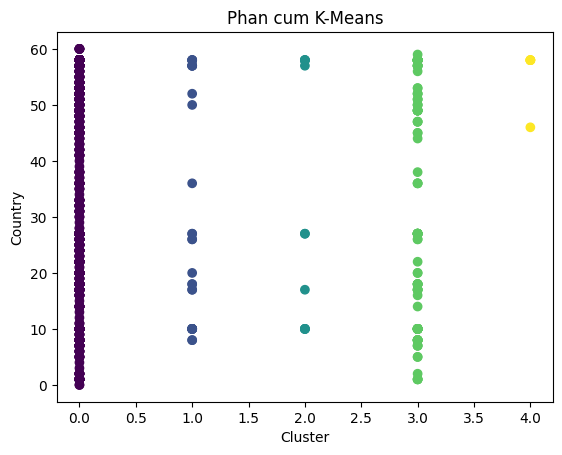

In [ ]:
kmean = KMeans(n_clusters = 6, random_state=42)
kmeans.fit(df_bln2)

df_bln2['Cluster'] = kmeans.labels_

plt.scatter(df_bln2['Cluster'], df_bln2['Country'], c = df_bln2['Cluster'], cmap = 'viridis')
plt.xlabel('Cluster')
plt.ylabel('Country')
plt.title('Phan cum K-Means')
plt.show()

**k-NN**

---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


X_1 = df_bln2.drop('Cluster', axis=1)  # Features
y_1 = df_bln2['Cluster']  # Target variable

#Chia tập dữ liệu thành tập train(80%) và tập test(20%)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=1)

#Xây dựng mô hình KNN với K lần lượt là 3, 5, 7, 9 trên tập train
from sklearn.neighbors import KNeighborsClassifier

knn_3_1 = KNeighborsClassifier(n_neighbors=3)
knn_5_1 = KNeighborsClassifier(n_neighbors=5)
knn_7_1 = KNeighborsClassifier(n_neighbors=7)
knn_9_1 = KNeighborsClassifier(n_neighbors=9)
knn_11_1 = KNeighborsClassifier(n_neighbors=11)

knn_3_1.fit(X_train_1, y_train_1)
knn_5_1.fit(X_train_1, y_train_1)
knn_7_1.fit(X_train_1, y_train_1)
knn_9_1.fit(X_train_1, y_train_1)
knn_11_1.fit(X_train_1, y_train_1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KNeighborsClassifier(n_neighbors=11)

In [ ]:
#Đánh giá mô hình trên tập test
y_pred_3_1 = knn_3_1.predict(X_test_1)
y_pred_5_1 = knn_5_1.predict(X_test_1)
y_pred_7_1 = knn_7_1.predict(X_test_1)
y_pred_9_1= knn_9_1.predict(X_test_1)
y_pred_11_1 = knn_11_1.predict(X_test_1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Tính toán sai số trên tập train và test
from sklearn.metrics import accuracy_score

train_error_3_1 = 1 - accuracy_score(y_train_1, knn_3_1.predict(X_train_1))
test_error_3_1 = 1 - accuracy_score(y_test_1, y_pred_3_1)

train_error_5_1 = 1 - accuracy_score(y_train_1, knn_5_1.predict(X_train_1))
test_error_5_1 = 1 - accuracy_score(y_test_1, y_pred_5_1)

train_error_7_1 = 1 - accuracy_score(y_train_1, knn_7_1.predict(X_train_1))
test_error_7_1 = 1 - accuracy_score(y_test_1, y_pred_7_1)

train_error_9_1 = 1 - accuracy_score(y_train_1, knn_9_1.predict(X_train_1))
test_error_9_1 = 1 - accuracy_score(y_test_1, y_pred_9_1)

train_error_11_1 = 1 - accuracy_score(y_train_1, knn_11_1.predict(X_train_1))
test_error_11_1 = 1 - accuracy_score(y_test_1, y_pred_11_1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


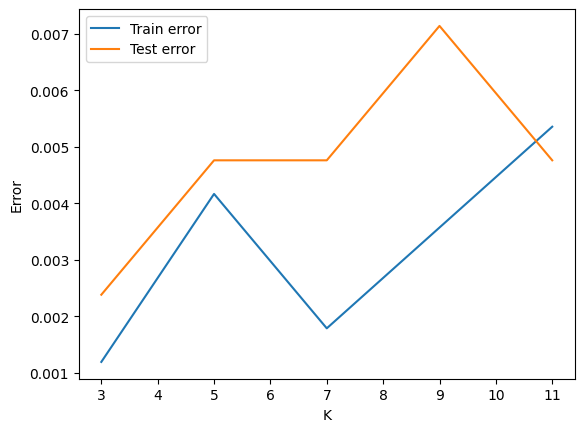

,K,Train Error,Test Error
0,3,0.001190,0.002381
1,5,0.004167,0.004762
2,7,0.001786,0.004762
3,9,0.003571,0.007143
4,11,0.005357,0.004762


In [ ]:
#Vẽ đồ thị sai số
import matplotlib.pyplot as plt

plt.plot([3, 5, 7, 9, 11], [train_error_3_1, train_error_5_1, train_error_7_1, train_error_9_1, train_error_11_1], label='Train error')
plt.plot([3, 5, 7, 9, 11], [test_error_3_1, test_error_5_1, test_error_7_1, test_error_9_1, test_error_11_1], label='Test error')

plt.xlabel('K')
plt.ylabel('Error')
plt.legend()

plt.show()

#Xuất thành dạng bảng
K_value = [3, 5, 7, 9, 11]
train_errors_1 = [train_error_3_1, train_error_5_1, train_error_7_1, train_error_9_1, train_error_11_1]
test_errors_1= [test_error_3_1, test_error_5_1, test_error_7_1, test_error_9_1, test_error_11_1]

#Tạo DataFrame từ các list trên
df_demo_1 = pd.DataFrame({'K': K_value,
                        'Train Error': train_errors_1,
                        'Test Error': test_errors_1})

#Xuất DataFrame ra file .csv
df_demo_1

**Rules Mining**

---



In [ ]:
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori, association_rules

one_hot_encoder = pd.get_dummies(df_bln2, columns = ['Country'])

one_hot_encoder['Sales'] = one_hot_encoder['Sales'].apply(lambda x:1 if x>100 else 0)
one_hot_encoder['Profit'] = one_hot_encoder['Profit'].apply(lambda x:1 if x>5 else 0)
one_hot_encoder['Assets'] = one_hot_encoder['Assets'].apply(lambda x:1 if x>100 else 0)
one_hot_encoder['Market Value'] = one_hot_encoder['Market Value'].apply(lambda x:1 if x>100 else 0)

one_hot_encoder.drop(columns=['Cluster'], inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_encoded = one_hot_encoder.applymap(lambda x:True if x == 1 else False)

frequent_itemsets = apriori(data_encoded, min_support = 0.035, use_colnames = True)

rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.5)

print(rules)

rules.to_excel("/content/drive/MyDrive/Learn/Data Mining/Companies_rules_2021.xlsx")

      antecedents     consequents  antecedent support  consequent support  \
0        (Profit)        (Assets)            0.057143            0.179048   
1  (Market Value)        (Profit)            0.067143            0.057143   
2        (Profit)  (Market Value)            0.057143            0.067143   
3  (Market Value)    (Country_58)            0.067143            0.290952   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.038571    0.675000  3.769947  0.028340    2.526007       0.779274  
1  0.037143    0.553191  9.680851  0.033306    2.110204       0.961244  
2  0.037143    0.650000  9.680851  0.033306    2.665306       0.951049  
3  0.038571    0.574468  1.974440  0.019036    1.666262       0.529049  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Decision Tree**

---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz


# Chọn các cột đặc trưng và label
ftr2 = df_bln2[["Country",	"Sales"	,"Profit", "Assets", 'Market Value']]

labels2 = df_bln2["Cluster"]

# Chuyển đổi các cột dữ liệu: text to num
ftr2 = pd.get_dummies(ftr2)

# Tách dữ liệu thành tập train, test
train_ftr2, test_ftr2, train_labels2, test_labels2 = train_test_split(ftr2, labels2, test_size=0.2, random_state=42)

# Xây dựng mô hình Cây quyết định
param_grid2 = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

# Tạo mô hình cây quyết định
clf2 = DecisionTreeClassifier()

#Sử dụng GridSearchCV để thử nghiệm các tham số và lựa chọn mô hình tốt nhất
grid_search2 = GridSearchCV(clf2, param_grid2, cv = 5, scoring = 'accuracy')
grid_search2.fit(train_ftr2, train_labels2)

# Lựa chọn mô hình tốt nhất sau khi thử nghiệm
best_clf2 = grid_search2.best_estimator_

# In ra các thông số tốt nhất của mô hình
print("Best Param: ", grid_search2.best_params_)
print("Best Accuracy: ", grid_search2.best_score_)


# Chuyển đổi nhãn lớp thành chuỗi
class_names_str2 = list(map(str, best_clf2.classes_))

# Tạo biểu diễn đồ thị cho cây quyết định
dot_dt2 = export_graphviz(best_clf2, out_file=None, feature_names=list(train_ftr2.columns),
                         class_names=class_names_str2, filled=True, rounded=True,
                         special_characters=True)

# Hiển thị đồ thị
graph = graphviz.Source(dot_dt2)
graph.render(filename='/content/drive/MyDrive/Forbes Billionaires n Companies/Forbes Billionaires n Companies/forbes companies/Dec_Comp-2021', format='png', cleanup=True)
graph.view()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Param:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
Best Accuracy:  0.9970238095238095


'/content/drive/MyDrive/Forbes Billionaires n Companies/Forbes Billionaires n Companies/forbes companies/Dec_Comp-2021.pdf'

In [ ]:
# Dự đoán kết quả trên tập Test bằng mô hình tốt nhất đã lựa chọn
predictions_2 = best_clf2.predict(test_ftr2)

accuracy2 = accuracy_score(test_labels2, predictions_2)
print("Accuracy on Test Set: ", accuracy2)

Accuracy on Test Set:  0.9952380952380953


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tách dữ liệu thành hai tập train và test
train_ftr2, test_ftr2, train_labels2, test_labels2 = train_test_split(ftr2, labels2, test_size=0.2, random_state=42)

# Xây dựng mô hình cây quyết định (REP Tree) với giới hạn độ sâu max_depth
max_depth2 = 10
clf_2 = DecisionTreeClassifier(max_depth = max_depth2)

# Huấn luyện mô hình trên tập Train
clf_2.fit(train_ftr2, train_labels2)

# Dự đoán kết quả trên tập Test
predictions_2 = clf_2.predict(test_ftr2)

# Đánh giá hiệu suất của mô hình trên tập Test
accuracy2 = accuracy_score(test_labels2, predictions_2)
print("Accuracy on Test Set: ", accuracy2)

Accuracy on Test Set:  0.9928571428571429


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 2022

---



---



In [4]:
import pandas as pd
df_bln3 = pd.read_csv("/content/drive/MyDrive/BTL-KPDL/Forbes Billionaires n Companies/forbes companies/forbes_companies_2022.csv")

df_bln3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rank            2000 non-null   int64 
 1   global company  2000 non-null   object
 2   country         2000 non-null   object
 3   sales           2000 non-null   object
 4   profit          2000 non-null   object
 5   assets          2000 non-null   object
 6   market value    2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


**Preprocessing**

---



In [ ]:
df_bln3 = df_bln3.drop(columns=['rank ', 'global company'])
df_bln3.rename(columns={'profit ': 'Profit', 'sales ': 'Sales', 'assets': 'Assets', 'market value': 'Market Value'}, inplace = True)

df_bln3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,country,Sales,Profit,Assets,Market Value
0,United States,$276.09 B,$89.8 B,$958.78 B,$741.48 B
1,China,$208.13 B,$54.03 B,"$5,518.51 B",$214.43 B
2,Saudi Arabia,$400.38 B,$105.36 B,$576.04 B,"$2,292.08 B"
3,United States,$124.54 B,$42.12 B,"$3,954.69 B",$374.45 B
4,China,$202.07 B,$46.89 B,"$4,746.95 B",$181.32 B
...,...,...,...,...,...
1995,China,$37 M,$1.41 B,$166 M,$1.14 B
1996,India,$3.52 B,$1.41 B,$5.71 B,$6.4 B
1997,China,$15.72 B,$53.1 M,$12.11 B,$1.96 B
1998,Russia,$2.53 B,$370.1 M,$45.15 B,$2.06 B


In [ ]:
def convert_net_worth_to_number(net_worth):
    if isinstance(net_worth, str):  # Kiểm tra nếu là chuỗi mới xử lý
        net_worth = net_worth.replace(',', '')  # Loại bỏ dấu phẩy
        value = float(net_worth.replace('$', '').replace('B', '').replace('M', ''))
        if 'B' in net_worth:
            return value
        elif 'M' in net_worth:
            value /= 1000  # Chuyển đổi thành tỷ
        return value
    else:
        return net_worth  # Giữ nguyên nếu là số float

# Áp dụng chuyển đổi cho cột 'Net Worth'
df_bln3['Profit'] = df_bln3['Profit'].apply(convert_net_worth_to_number)
df_bln3['Sales'] = df_bln3['Sales'].apply(convert_net_worth_to_number)
df_bln3['Assets'] = df_bln3['Assets'].apply(convert_net_worth_to_number)
df_bln3['Market Value'] = df_bln3['Market Value'].apply(convert_net_worth_to_number)

# Hiển thị kết quả
print(df_bln3)

            country    Sales    Profit    Assets  Market Value
0     United States  276.090   89.8000   958.780        741.48
1             China  208.130   54.0300  5518.510        214.43
2      Saudi Arabia  400.380  105.3600   576.040       2292.08
3     United States  124.540   42.1200  3954.690        374.45
4             China  202.070   46.8900  4746.950        181.32
...             ...      ...       ...       ...           ...
1995          China    0.037    1.4100     0.166          1.14
1996          India    3.520    1.4100     5.710          6.40
1997          China   15.720    0.0531    12.110          1.96
1998         Russia    2.530    0.3701    45.150          2.06
1999          China    4.410    0.9313     7.640          9.52

[2000 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tính toán dữ liệu null
df_bln3.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


country         0
Sales           0
Profit          0
Assets          0
Market Value    0
dtype: int64

**Thống kê**

---



*TOP 10 QUỐC GIA CÓ LỢI NHUẬN CAO NHẤT VÀ THẤP NHẤT*

In [ ]:
# Nhóm dữ liệu theo trường "Country" và tính tổng lợi nhuận cho mỗi nhóm
profit_by_country = df_bln3.groupby("country")["Profit"].sum()

# Tạo DataFrame mới từ Series tổng lợi nhuận
top_countries_df = pd.DataFrame({"country": profit_by_country.index, "Profit": profit_by_country.values})

# Sắp xếp theo tổng lợi nhuận giảm dần và lấy 10 quốc gia đầu tiên
top_10_countries = top_countries_df.sort_values(by="Profit", ascending=False).head(10)
# Sắp xếp theo tổng lợi nhuận giảm dần và lấy 10 quốc gia đầu tiên
top_10_countries_small = top_countries_df.sort_values(by="Profit", ascending=True).head(10)

# In kết quả
print(top_10_countries)

In [ ]:
import plotly.express as px
fig = px.bar( top_10_countries, x="country", y="Profit",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 Highest Profit',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

In [ ]:
import plotly.express as px
fig = px.bar( top_10_countries_small, x="country", y="Profit",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 Lowest Profit',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

*TOP 10 QUỐC GIA SALES CAO NHẤT VÀ THẤP NHẤT*

In [ ]:
# Nhóm dữ liệu theo trường "Country" và tính tổng lợi nhuận cho mỗi nhóm
profit_by_country_sales = df_bln3.groupby("country")["Sales"].sum()

# Tạo DataFrame mới từ Series tổng lợi nhuận
top_countries_df = pd.DataFrame({"country": profit_by_country_sales.index, "Sales": profit_by_country_sales.values})

# Sắp xếp theo tổng lợi nhuận giảm dần và lấy 10 quốc gia đầu tiên
top_10_countries_sales = top_countries_df.sort_values(by="Sales", ascending=False).head(10)
top_10_countries_sales_small = top_countries_df.sort_values(by="Sales", ascending=True).head(10)


# In kết quả
print(top_10_countries_sales)

In [ ]:
import plotly.express as px
fig = px.bar( top_10_countries_sales, x="country", y="Sales",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 highest sales',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

In [ ]:
fig = px.bar( top_10_countries_sales_small, x="country", y="Sales",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 lowest sales',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

*TOP 10 QUỐC GIA CÓ ASSETS CAO NHẤT VÀ THẤP NHẤT*

In [ ]:
# Nhóm dữ liệu theo trường "Country" và tính tổng lợi nhuận cho mỗi nhóm
profit_by_country_assets = df_bln3.groupby("country")["Assets"].sum()

# Tạo DataFrame mới từ Series tổng lợi nhuận
top_countries_df = pd.DataFrame({"country": profit_by_country_assets.index, "Assets": profit_by_country_assets.values})

# Sắp xếp theo tổng lợi nhuận giảm dần và lấy 10 quốc gia đầu tiên
top_10_countries_assets = top_countries_df.sort_values(by="Assets", ascending=False).head(10)
top_10_countries_assets_small = top_countries_df.sort_values(by="Assets", ascending=True).head(10)

# In kết quả
print(top_10_countries_assets)

In [ ]:
import plotly.express as px
fig = px.bar( top_10_countries_assets, x="country", y="Assets",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 highest assets',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

In [ ]:
fig = px.bar( top_10_countries_assets_small, x="country", y="Assets",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 low assets',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

*TOP 10 QUỐC GIA CÓ MARKET VALUE CAO NHẤT VÀ THẤP NHẤT*

In [ ]:
# Nhóm dữ liệu theo trường "Country" và tính tổng lợi nhuận cho mỗi nhóm
profit_by_country_marketvalue = df_bln3.groupby("country")["Market Value"].sum()

# Tạo DataFrame mới từ Series tổng lợi nhuận
top_countries_df = pd.DataFrame({"country": profit_by_country_marketvalue.index, "Market Value": profit_by_country_marketvalue.values})

# Sắp xếp theo tổng lợi nhuận giảm dần và lấy 10 quốc gia đầu tiên
top_10_countries_maketvalue = top_countries_df.sort_values(by="Market Value", ascending=False).head(10)
top_10_countries_maketvalue_small = top_countries_df.sort_values(by="Market Value", ascending=True).head(10)

# In kết quả
print(top_10_countries_marketvalue)

In [ ]:
fig = px.bar( top_10_countries_marketvalue, x="country", y="Market Value",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 highest Market Value',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

In [ ]:
fig = px.bar( top_10_countries_marketvalue_small, x="country", y="Market Value",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title_text='Top 10 slow Market Value',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

*TẦN SUẤT XUẤT HIỆN CỦA CÁC QUỐC GIA*

In [ ]:
import plotly.express as px

# Tính tần số xuất hiện của các quốc gia
country_frequency = df_bln3["country"].value_counts()

# Tạo biểu đồ cột bằng Plotly Express
fig = px.bar(country_frequency, x=country_frequency.index, y=country_frequency.values)
fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Frequency",
    title="Frequency of Countries"
)
fig.show()

**K-Means**

---



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_bln3['country'] = label_encoder.fit_transform(df_bln3['country'])

df_bln3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,country,Sales,Profit,Assets,Market Value
0,54,276.090,89.8000,958.780,741.48
1,10,208.130,54.0300,5518.510,214.43
2,42,400.380,105.3600,576.040,2292.08
3,54,124.540,42.1200,3954.690,374.45
4,10,202.070,46.8900,4746.950,181.32
...,...,...,...,...,...
1995,10,0.037,1.4100,0.166,1.14
1996,21,3.520,1.4100,5.710,6.40
1997,10,15.720,0.0531,12.110,1.96
1998,41,2.530,0.3701,45.150,2.06


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

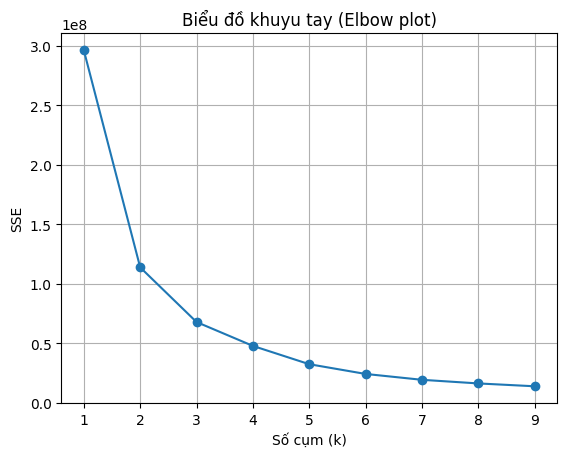

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
sse_values = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_bln3)
    sse_values.append(kmeans.inertia_)

#  Vẽ biểu đồ khuyu tay
plt.plot(range(1, 10), sse_values, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('SSE')
plt.title('Biểu đồ khuyu tay (Elbow plot)')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_bln3[['country', 'Sales', 'Profit', 'Assets', 'Market Value']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [ ]:
labels = kmeans.labels_
df_bln3['Cluster'] = labels
df_bln3[df_bln3['Cluster'] == 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,country,Sales,Profit,Assets,Market Value,Cluster
33,54,117.930,39.3700,165.990,499.86,1
38,54,94.880,19.8300,182.020,477.38,1
42,54,81.490,21.9800,181.480,271.83,1
45,48,95.250,18.4900,152.710,360.01,1
50,54,79.020,19.8700,168.410,190.29,1
...,...,...,...,...,...,...
1995,10,0.037,1.4100,0.166,1.14,1
1996,21,3.520,1.4100,5.710,6.40,1
1997,10,15.720,0.0531,12.110,1.96,1
1998,41,2.530,0.3701,45.150,2.06,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


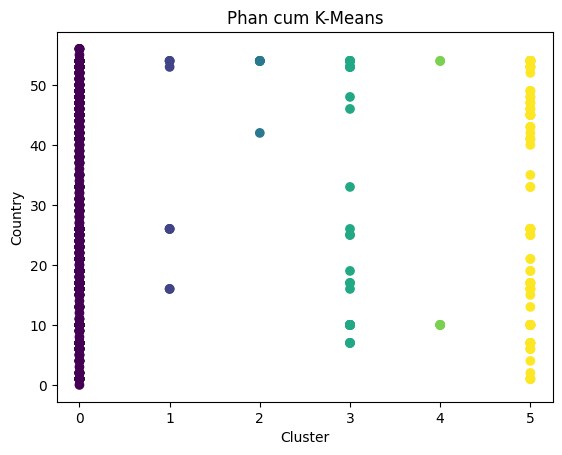

In [ ]:
kmean = KMeans(n_clusters = 6, random_state=42)
kmeans.fit(df_bln3)

df_bln3['Cluster'] = kmeans.labels_

plt.scatter(df_bln3['Cluster'], df_bln3['country'], c = df_bln3['Cluster'], cmap = 'viridis')
plt.xlabel('Cluster')
plt.ylabel('Country')
plt.title('Phan cum K-Means')
plt.show()

**k-NN**

---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


X_1 = df_bln3.drop('Cluster', axis=1)  # Features
y_1 = df_bln3['Cluster']  # Target variable

# Chia tập dữ liệu thành tập train(80%) và tập test(20%)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=1)

# Xây dựng mô hình KNN với K lần lượt là 3, 5, 7, 9 trên tập train
from sklearn.neighbors import KNeighborsClassifier

knn_3_1 = KNeighborsClassifier(n_neighbors=3)
knn_5_1 = KNeighborsClassifier(n_neighbors=5)
knn_7_1 = KNeighborsClassifier(n_neighbors=7)
knn_9_1 = KNeighborsClassifier(n_neighbors=9)
knn_11_1 = KNeighborsClassifier(n_neighbors=11)

knn_3_1.fit(X_train_1, y_train_1)
knn_5_1.fit(X_train_1, y_train_1)
knn_7_1.fit(X_train_1, y_train_1)
knn_9_1.fit(X_train_1, y_train_1)
knn_11_1.fit(X_train_1, y_train_1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KNeighborsClassifier(n_neighbors=11)

In [ ]:
# Đánh giá mô hình trên tập test
y_pred_3_1 = knn_3_1.predict(X_test_1)
y_pred_5_1 = knn_5_1.predict(X_test_1)
y_pred_7_1 = knn_7_1.predict(X_test_1)
y_pred_9_1= knn_9_1.predict(X_test_1)
y_pred_11_1 = knn_11_1.predict(X_test_1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tính toán sai số trên tập train và test
from sklearn.metrics import accuracy_score

train_error_3_1 = 1 - accuracy_score(y_train_1, knn_3_1.predict(X_train_1))
test_error_3_1 = 1 - accuracy_score(y_test_1, y_pred_3_1)

train_error_5_1 = 1 - accuracy_score(y_train_1, knn_5_1.predict(X_train_1))
test_error_5_1 = 1 - accuracy_score(y_test_1, y_pred_5_1)

train_error_7_1 = 1 - accuracy_score(y_train_1, knn_7_1.predict(X_train_1))
test_error_7_1 = 1 - accuracy_score(y_test_1, y_pred_7_1)

train_error_9_1 = 1 - accuracy_score(y_train_1, knn_9_1.predict(X_train_1))
test_error_9_1 = 1 - accuracy_score(y_test_1, y_pred_9_1)

train_error_11_1 = 1 - accuracy_score(y_train_1, knn_11_1.predict(X_train_1))
test_error_11_1 = 1 - accuracy_score(y_test_1, y_pred_11_1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


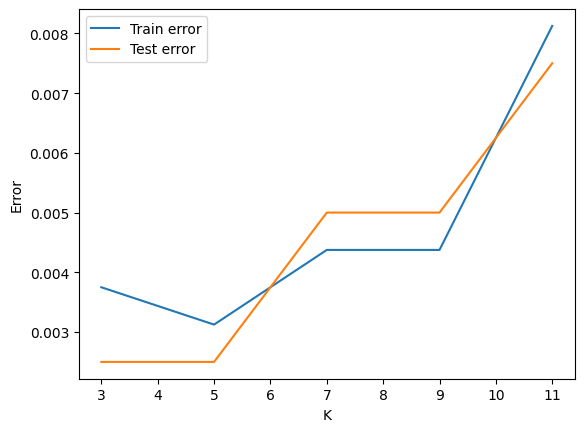

,K,Train Error,Test Error
0,3,0.003750,0.0025
1,5,0.003125,0.0025
2,7,0.004375,0.0050
3,9,0.004375,0.0050
4,11,0.008125,0.0075


In [ ]:
#Vẽ đồ thị sai số
import matplotlib.pyplot as plt

plt.plot([3, 5, 7, 9, 11], [train_error_3_1, train_error_5_1, train_error_7_1, train_error_9_1, train_error_11_1], label='Train error')
plt.plot([3, 5, 7, 9, 11], [test_error_3_1, test_error_5_1, test_error_7_1, test_error_9_1, test_error_11_1], label='Test error')

plt.xlabel('K')
plt.ylabel('Error')
plt.legend()

plt.show()

#Xuất thành dạng bảng
K_value = [3, 5, 7, 9, 11]
train_errors_1 = [train_error_3_1, train_error_5_1, train_error_7_1, train_error_9_1, train_error_11_1]
test_errors_1= [test_error_3_1, test_error_5_1, test_error_7_1, test_error_9_1, test_error_11_1]

#Tạo DataFrame từ các list trên
df_demo_3 = pd.DataFrame({'K': K_value,
                        'Train Error': train_errors_1,
                        'Test Error': test_errors_1})

#Xuất DataFrame ra file .csv
df_demo_3

**Rules Mining**

---



In [ ]:
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori, association_rules

one_hot_encoder = pd.get_dummies(df_bln3, columns = ['country'])

one_hot_encoder['Sales'] = one_hot_encoder['Sales'].apply(lambda x:1 if x>100 else 0)
one_hot_encoder['Profit'] = one_hot_encoder['Profit'].apply(lambda x:1 if x>5 else 0)
one_hot_encoder['Assets'] = one_hot_encoder['Assets'].apply(lambda x:1 if x>100 else 0)
one_hot_encoder['Market Value'] = one_hot_encoder['Market Value'].apply(lambda x:1 if x>100 else 0)

one_hot_encoder.drop(columns=['Cluster'], inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_encoded = one_hot_encoder.applymap(lambda x:True if x == 1 else False)

frequent_itemsets = apriori(data_encoded, min_support = 0.035, use_colnames = True)

rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.5)

print(rules)

rules.to_excel("/content/drive/MyDrive/Learn/Data Mining/Companies_rules_2022.xlsx")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      antecedents   consequents  antecedent support  consequent support  \
0        (Profit)      (Assets)               0.114              0.1955   
1  (Market Value)      (Profit)               0.065              0.1140   
2  (Market Value)      (Assets)               0.065              0.1955   
3  (Market Value)  (country_54)               0.065              0.2950   

   support  confidence      lift  leverage  conviction  zhangs_metric  
0   0.0680    0.596491  3.051106  0.045713    1.993761       0.758747  
1   0.0530    0.815385  7.152497  0.045590    4.799167       0.919988  
2   0.0375    0.576923  2.951013  0.024792    1.901545       0.707094  
3   0.0380    0.584615  1.981747  0.018825    1.697222       0.529834  


**Decision Tree**

---



In [ ]:
df_bln3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,country,Sales,Profit,Assets,Market Value,Cluster
0,54,276.090,89.8000,958.780,741.48,3
1,10,208.130,54.0300,5518.510,214.43,4
2,42,400.380,105.3600,576.040,2292.08,2
3,54,124.540,42.1200,3954.690,374.45,4
4,10,202.070,46.8900,4746.950,181.32,4
...,...,...,...,...,...,...
1995,10,0.037,1.4100,0.166,1.14,5
1996,21,3.520,1.4100,5.710,6.40,5
1997,10,15.720,0.0531,12.110,1.96,5
1998,41,2.530,0.3701,45.150,2.06,5


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# Chọn các cột đặc trưng và label
ftr3 = df_bln3[["country",	"Sales"	,"Profit", "Assets", 'Market Value']]

labels3 = df_bln3["Cluster"]

# Chuyển đổi các cột dữ liệu: text to num
ftr3 = pd.get_dummies(ftr3)

# Tách dữ liệu thành tập train, test
train_ftr3, test_ftr3, train_labels3, test_labels3 = train_test_split(ftr3, labels3, test_size=0.2, random_state=42)

# Xây dựng mô hình Cây quyết định
param_grid3 = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

# Tạo mô hình cây quyết định
clf3 = DecisionTreeClassifier()

#Sử dụng GridSearchCV để thử nghiệm các tham số và lựa chọn mô hình tốt nhất
grid_search3 = GridSearchCV(clf3, param_grid3, cv = 5, scoring = 'accuracy')
grid_search3.fit(train_ftr3, train_labels3)

# Lựa chọn mô hình tốt nhất sau khi thử nghiệm
best_clf3 = grid_search3.best_estimator_

# In ra các thông số tốt nhất của mô hình
print("Best Param: ", grid_search3.best_params_)
print("Best Accuracy: ", grid_search3.best_score_)


# Chuyển đổi nhãn lớp thành chuỗi
class_names_str3 = list(map(str, best_clf3.classes_))

# Tạo biểu diễn đồ thị cho cây quyết định
dot_dt3 = export_graphviz(best_clf3, out_file=None, feature_names=list(train_ftr3.columns),
                         class_names=class_names_str3, filled=True, rounded=True,
                         special_characters=True)

# Hiển thị đồ thị
graph = graphviz.Source(dot_dt3)
graph.render(filename='/content/drive/MyDrive/Forbes Billionaires n Companies/Forbes Billionaires n Companies/forbes companies/Dec-Comp_2022', format='png', cleanup=True)
graph.view()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Param:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Accuracy:  0.9981250000000002


'/content/drive/MyDrive/Forbes Billionaires n Companies/Forbes Billionaires n Companies/forbes companies/Dec-Comp_2022.pdf'

In [ ]:
# Dự đoán kết quả trên tập Test bằng mô hình tốt nhất đã lựa chọn
predictions_3 = best_clf3.predict(test_ftr3)

accuracy3 = accuracy_score(test_labels3, predictions_3)
print("Accuracy on Test Set: ", accuracy3)

Accuracy on Test Set:  1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tách dữ liệu thành hai tập train và test
train_ftr3, test_ftr3, train_labels3, test_labels3 = train_test_split(ftr3, labels3, test_size=0.2, random_state=42)

# Xây dựng mô hình cây quyết định (REP Tree) với giới hạn độ sâu max_depth
max_depth3 = 10
clf_3 = DecisionTreeClassifier(max_depth = max_depth3)

# Huấn luyện mô hình trên tập Train
clf_3.fit(train_ftr3, train_labels3)

# Dự đoán kết quả trên tập Test
predictions_3 = clf_3.predict(test_ftr3)

# Đánh giá hiệu suất của mô hình trên tập Test
accuracy3 = accuracy_score(test_labels3, predictions_3)
print("Accuracy on Test Set: ", accuracy3)

Accuracy on Test Set:  1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
